In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def resolution_slope(a,b,c,k):
    AA=a+b*k+c*k*k
    by=np.sqrt(-4*AA/(pow(b+2*c*k,2)-4*AA*c))
    return by,np.sqrt(1/c)

In [56]:
H=2
K=-0.4
L=0
E=2.055
lattice_constant=6.291
k=2.04

# Qx Qy hw Qz
# Mmatrix0 from ResLibCal
Mmatrix0=np.array([[22572.9, -5315.6,    -0.0,  -746.8],
[-5315.6, 12506.9,     0.0 , 2005.0],
 [  -0.0,     0.0,  1390.0,     0.0],
 [-746.8,  2005.0,     0.0,   341.2]])
Mmatrix0=Mmatrix0/np.log(2)/2

# convert M to Qx Qy Qz coordinate
Mconvert=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

Mmatrix=np.matmul(Mconvert,np.matmul(Mmatrix0,Mconvert))

# a q^2 + b qE + cE^2 = 2 ln2 
a=Mmatrix[0,0]*H*H+Mmatrix[1,1]*K*K+Mmatrix[2,2]*L*L
a=a+2*Mmatrix[0,1]*H*K+2*Mmatrix[0,2]*L*H+2*Mmatrix[1,2]*K*L
b=2*H*Mmatrix[0,3]*E+2*K*Mmatrix[1,3]*E+2*L*Mmatrix[2,3]*E
c=Mmatrix[3,3]*E*E

ra=2*np.pi/lattice_constant

a=ra*ra*a/(H*H+K*K+L*L)

b=ra*b/np.sqrt(H*H+K*K+L*L)/E

c=c/E/E

print('M Matrix is ')
print(Mmatrix)
print('a b c are')
print(a,b,c)
print('Slope of dispersion is ')
print('k=',k)

M Matrix is 
[[16282.90544424 -3834.39487967     0.          -538.70232827]
 [-3834.39487967  9021.82130345     0.          1446.30177849]
 [    0.             0.          1002.67305342     0.        ]
 [ -538.70232827  1446.30177849     0.           246.12377398]]
a b c are
17435.003801342948 -1621.7513677968097 246.12377397565717
Slope of dispersion is 
k= 2.04


In [57]:
d,d1=resolution_slope(a,b,c,k)
print('corrected FWHM is',2*d)
print('dE=',2*d1)

corrected FWHM is 0.12914502693305774
dE= 0.12748327528032985


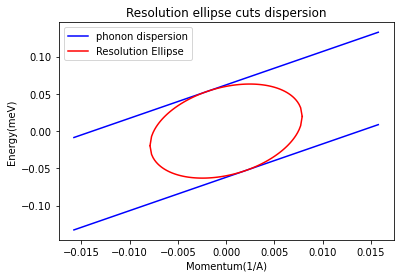

In [47]:
ub=np.sqrt(4*c/(4*a*c-b*b))
x=np.linspace(-ub,ub,100)
x1=np.linspace(-2*ub,2*ub,200)
plt.plot(x1,k*x1+d,label='phonon dispersion',color='b')
plt.plot(x1,k*x1-d,color='b')
plt.plot(x,(-b*x+np.sqrt(b*b*x*x-4*c*(a*x*x-1)))/2/c,label='Resolution Ellipse',color='r')
plt.plot(x,(-b*x-np.sqrt(b*b*x*x-4*c*(a*x*x-1)))/2/c,color='r')
plt.ylabel('Energy(meV)')
plt.xlabel('Momentum(1/A)')
plt.title("Resolution ellipse cuts dispersion")
plt.legend()